Beast Analytics
===============

Single output file analise
--------------------------

#### Results file for analysis

In [1]:
file_name = 'datasets/sample.csv'

---
#### Load data

In [2]:
# Imports
import pandas as pd
import seaborn as sea
import numpy as np
from functions import to_datetime, delta_in_seconds
# Data loading
bo = pd.read_csv(file_name)

Sample data

In [3]:
bo.head(20)

,Timestamp,Request,Result,StatusCode,IsSuccess,Duration
0,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/114,Executed,200.0,True,28
1,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/119,Executed,200.0,True,28
2,2020-08-06 23:04:36.031,GET http://127.0.0.1:8080/apps/108,Executed,200.0,True,46
3,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/102,Executed,200.0,True,45
4,2020-08-06 23:04:36.031,GET http://127.0.0.1:8080/apps/106,Executed,200.0,True,53
5,2020-08-06 23:04:36.031,GET http://127.0.0.1:8080/apps/101,Executed,200.0,True,53
6,2020-08-06 23:04:36.031,GET http://127.0.0.1:8080/apps/111,Executed,200.0,True,57
7,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/106,Executed,200.0,True,58
8,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/120,Executed,200.0,True,62
9,2020-08-06 23:04:36.032,GET http://127.0.0.1:8080/apps/115,Executed,200.0,True,65


Cleaning and additional processing

In [4]:
# Add addition columns
bo['TimestampBySecond'] = bo.Timestamp.apply(to_datetime)
first_datetime = bo.TimestampBySecond.min()
bo['ExecutionPace'] = bo.TimestampBySecond.apply(delta_in_seconds, args=(first_datetime,))
# Droping columns
bo = bo.drop(['Timestamp'], axis=1)

Some info about the data

In [5]:
bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request            10000 non-null  object        
 1   Result             10000 non-null  object        
 2   StatusCode         9999 non-null   float64       
 3   IsSuccess          10000 non-null  bool          
 4   Duration           10000 non-null  int64         
 5   TimestampBySecond  10000 non-null  datetime64[ns]
 6   ExecutionPace      10000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 478.6+ KB


Sampling

In [6]:
bo.head(20)

,Request,Result,StatusCode,IsSuccess,Duration,TimestampBySecond,ExecutionPace
0,GET http://127.0.0.1:8080/apps/114,Executed,200.0,True,28,2020-08-06 23:04:36,0
1,GET http://127.0.0.1:8080/apps/119,Executed,200.0,True,28,2020-08-06 23:04:36,0
2,GET http://127.0.0.1:8080/apps/108,Executed,200.0,True,46,2020-08-06 23:04:36,0
3,GET http://127.0.0.1:8080/apps/102,Executed,200.0,True,45,2020-08-06 23:04:36,0
4,GET http://127.0.0.1:8080/apps/106,Executed,200.0,True,53,2020-08-06 23:04:36,0
5,GET http://127.0.0.1:8080/apps/101,Executed,200.0,True,53,2020-08-06 23:04:36,0
6,GET http://127.0.0.1:8080/apps/111,Executed,200.0,True,57,2020-08-06 23:04:36,0
7,GET http://127.0.0.1:8080/apps/106,Executed,200.0,True,58,2020-08-06 23:04:36,0
8,GET http://127.0.0.1:8080/apps/120,Executed,200.0,True,62,2020-08-06 23:04:36,0
9,GET http://127.0.0.1:8080/apps/115,Executed,200.0,True,65,2020-08-06 23:04:36,0


---
#### Successful Results

In [7]:
bos = bo[bo.IsSuccess]

Request duration stats

In [8]:
bos.Duration.describe(percentiles=[.20, .40, .60, .80, .90, .95, .99])

count    9997.000000
mean       77.593878
std        30.186822
min        25.000000
20%        52.000000
40%        66.000000
50%        71.000000
60%        79.000000
80%        98.000000
90%       117.000000
95%       136.000000
99%       176.000000
max       316.000000
Name: Duration, dtype: float64

Stats by status code

In [9]:
bos.groupby('StatusCode').Duration.agg(
    ['count', 'min', 'max', 'mean', 'std']
).sort_values('mean', ascending=False)

,count,min,max,mean,std
StatusCode,,,,,
200.0,9997,25,316,77.593878,30.186822


---
#### Errors

In [10]:
bof = bo[~bo.IsSuccess]
bofc = bof[bof.Result != 'Executed']
bofs = bof[bof.Result == 'Executed']

Sampling

In [11]:
bof.head(20)

,Request,Result,StatusCode,IsSuccess,Duration,TimestampBySecond,ExecutionPace
498,GET http://127.0.0.1:8080/apps/invalid,Executed,404.0,False,83,2020-08-06 23:04:36,0
748,GET http://127.0.0.1:8080/apps/120,Request timeout,NaN,False,30000,2020-08-06 23:04:36,0
2105,GET http://127.0.0.1:8080/apps/invalid,Executed,404.0,False,54,2020-08-06 23:04:38,2


Client side errors by result

In [12]:
bofc.groupby('Result').TimestampBySecond.count().sort_values(ascending=False)

Result
Request timeout    1
Name: TimestampBySecond, dtype: int64

Server side errors by status code

In [13]:
bofs.groupby('StatusCode').TimestampBySecond.count().sort_values(ascending=False)

StatusCode
404.0    2
Name: TimestampBySecond, dtype: int64

---
#### Charts

In [14]:
sea.set(
    style="darkgrid", 
    rc={'figure.figsize':(11.7,8.27)}
)

Average Request Duration Second by Second

[Text(0.5, 1.0, 'Average Request Duration Second by Second'),
 Text(0.5, 0, 'Execution (second by second)'),
 Text(0, 0.5, 'Duration (ms)')]

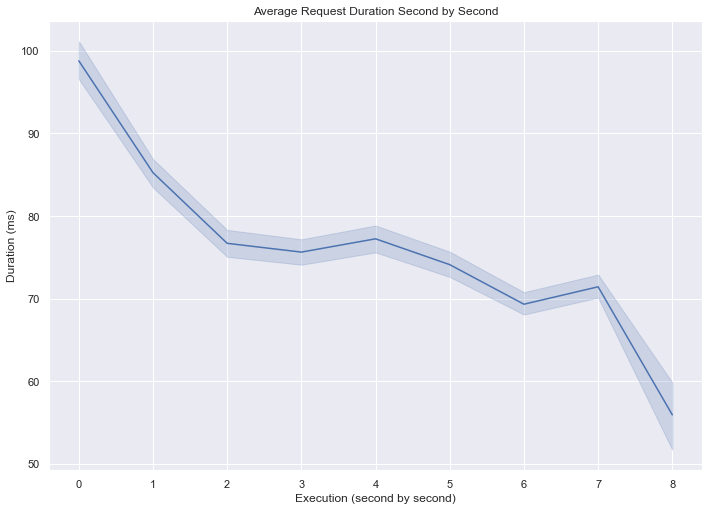

In [15]:
duration_img=sea.lineplot(
    x="ExecutionPace", 
    y="Duration", 
    estimator=np.average, 
    data=bos,
)
duration_img.set(
    title='Average Request Duration Second by Second', 
    xlabel='Execution (second by second)', 
    ylabel='Duration (ms)'
)

Requests per Second

[Text(0.5, 1.0, 'Requests per Second'),
 Text(0.5, 0, 'Execution (second by second)'),
 Text(0, 0.5, 'Number of Requests')]

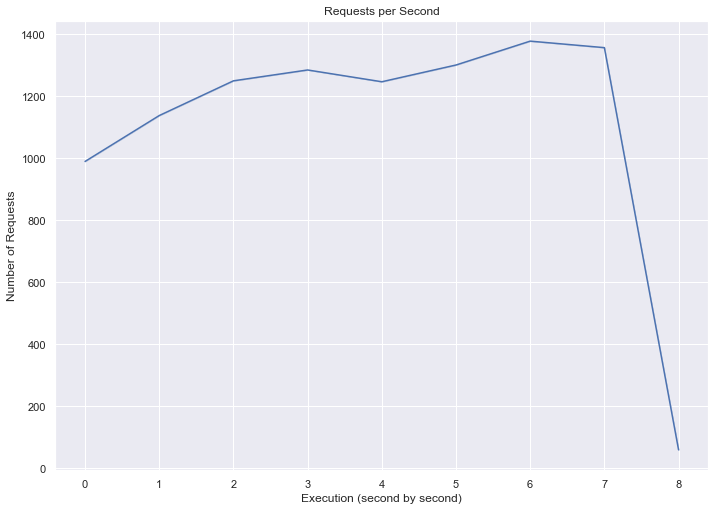

In [16]:
rps_img=sea.lineplot(
    x="ExecutionPace", 
    y="StatusCode", 
    estimator=np.count_nonzero, 
    data=bos,
)
rps_img.set(
    title='Requests per Second', 
    xlabel='Execution (second by second)', 
    ylabel='Number of Requests'
)

Request Duration vs Requests per Second

[Text(0, 0.5, 'Number of Requests')]

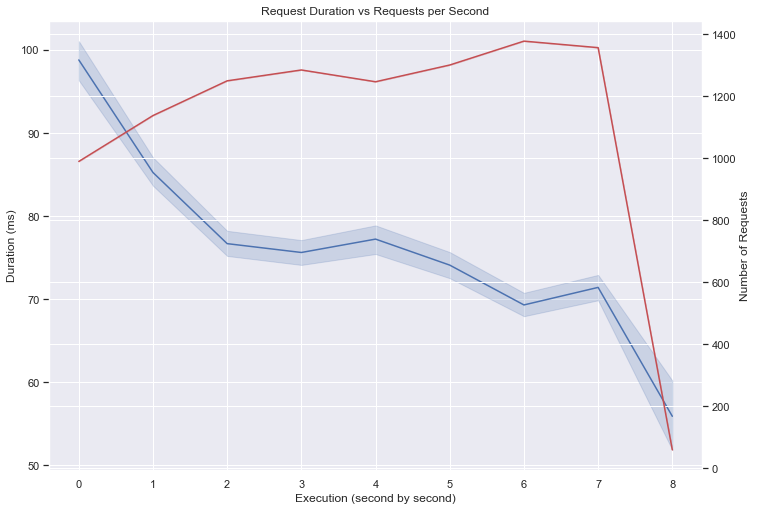

In [17]:
fig = sea.lineplot(
    x="ExecutionPace", 
    y="Duration", 
    estimator=np.average, 
    data=bos,
)
fig.set(
    title='Request Duration vs Requests per Second', 
    xlabel='Execution (second by second)', 
    ylabel='Duration (ms)'
)
fig2 = sea.lineplot(
    x="ExecutionPace", 
    y="StatusCode", 
    estimator=np.count_nonzero, 
    data=bos,
    ax=fig.twinx(), 
    color='r',
)
fig2.set(
    ylabel='Number of Requests'
)

Errors

[Text(0.5, 1.0, 'Errors per Second'),
 Text(0.5, 0, 'Execution (second by second)'),
 Text(0, 0.5, 'Number of Errors')]

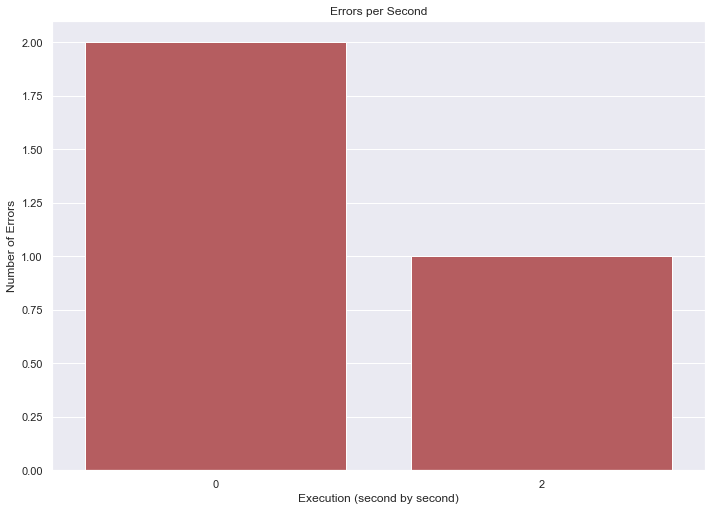

In [18]:
errors_img=sea.barplot(
    x="ExecutionPace", 
    y="TimestampBySecond", 
    estimator=np.count_nonzero, 
    data=bof,
    color='r'
)
errors_img.set(
    title='Errors per Second', 
    xlabel='Execution (second by second)', 
    ylabel='Number of Errors'
)